# 4: Deutsch algorithm

In [1]:
from renom_q import *

The Deutsch problem is the problem of judging the type of a function $f(x)$ whose binary variable $x$ takes 0, 1 and whose function value is also a binary number.
- The constant function     $f(0) = f(1)$
- The balanced function     $f(0) \neq f(1)$

A quantum circuit that implements the function $f_x$ is called an oracle and is a quantum gate of a unitary matrix $U_f$ of some black box that realizes the properties of the function.

$$\left| x \right\rangle\left| y \right\rangle \xrightarrow{U_f} \left| x \right\rangle\left| y \oplus f(x) \right\rangle$$

In the Deutsch problem, by configuring the output bit　$\left| x \right\rangle$　of the Oracle to be $f(0) \oplus f(1)$, it is possible to judge that when the upper bit is measured, if it is $\left| 1 \right\rangle$, it is a balanced function, if it is $\left| 0 \right\rangle$, it can be determined to be a constant function.

$$\left| 0 \right\rangle\left| 1 \right\rangle \xrightarrow{H \otimes H} \frac{\left| 0 \right\rangle + \left| 1 \right\rangle}{\sqrt{2}} \frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}} \xrightarrow{U_f} \pm \frac{\left| 0 \right\rangle \pm \left| 1 \right\rangle}{\sqrt{2}}\frac{\left| 0 \right\rangle - \left| 1 \right\rangle}{\sqrt{2}} \xrightarrow{H \otimes H} \pm \left| f(0) \oplus f(1) \right\rangle\left| 1 \right\rangle$$

<img src='images/oracle.png' width=50%>

## Example1: Constant function

{'0': 1024}


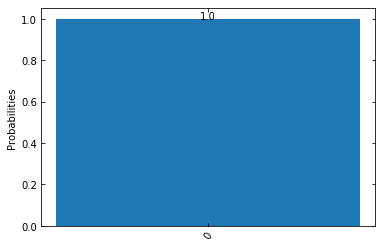

In [2]:
def c_oracle(qci, x, y_fx):
    qci.x(y_fx)

bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.x(q[1])
for i in range(bn):
    qc.h(q[i])

c_oracle(qc, q[0], q[1])

for i in range(bn):
    qc.h(q[i])

qc.measure(q[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)

## Example2: Balanced function

{'1': 1024}


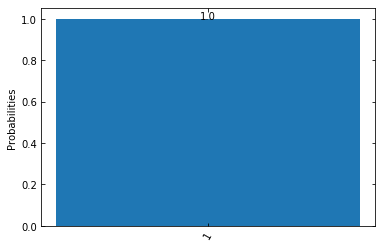

In [3]:
def b_oracle(qci, x, y_fx):
    qci.cx(x, y_fx)
    
bn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(1)
qc = QuantumCircuit(q, c)

qc.x(q[1])
for i in range(bn):
    qc.h(q[i])

b_oracle(qc, q[0], q[1])

for i in range(bn):
    qc.h(q[i])

qc.measure(q[0], c[0])

r = execute(qc)
print(r)
plot_histogram(r)